<a href="https://colab.research.google.com/github/xie186/Algorithms_for_DNA-Sequencing/blob/main/docs/BIOI611_bulkRNA_SE_ballgown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Isoform-level differential expression analysis with Ballgown.

## Install R package

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ballgown")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'ballgown'

also installing the dependencies ‘plogr’, ‘png’, ‘formatR’, ‘abind’, ‘SparseArray’, ‘RSQLite’, ‘KEGGREST’, ‘lambda.r’, ‘futile.options’, ‘S4Arrays’, ‘DelayedArray’, ‘MatrixGenerics’, ‘AnnotationDbi’, ‘annotate’, ‘futile.logger’, ‘snow’, ‘BH’, ‘locfit’, ‘bitops’, ‘Rhtslib’, ‘SummarizedExperiment’, ‘RCurl’, ‘rjson’, ‘BiocGenerics’, ‘XVector’, ‘genefilter’, ‘BiocParallel’, ‘matrixStats’, ‘edgeR’, ‘statmod’, ‘XML’, ‘Biostrings’, ‘zlibbioc’, ‘Rsamtools’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘GenomicRanges’, ‘IRanges’, ‘S4Vectors’, ‘sva’, ‘limma’, ‘rtracklayer’, ‘

In [ ]:
library(ballgown)



Attaching package: ‘ballgown’


The following object is masked from ‘package:base’:

    structure




> <img src="https://github.com/user-attachments/assets/0c96db06-eddd-4a81-8876-c357edaef7c2" width=5% height=5%>
Please upload your data generated by `tablemaker. Please refer to the section **Running Tablemaker** the link [here](https://www.bioconductor.org/packages/release/bioc/vignettes/ballgown/inst/doc/ballgown.html) for details.

You can also download a copy from the path below:

```
/scratch/zt1/project/bioi611/shared/output/bulkRNA_SE_tablemaker.tar.gz
```

Or you can download a copy via the link below:

https://umd0-my.sharepoint.com/:u:/g/personal/xie186_umd_edu/EYLz8khnMeRCmyK_YFDDXaQBP_4hzpAgs_nN-TNXghdQMQ?e=5By9ct




In [ ]:
getwd()

[1] "/content"

In [ ]:

system("tar zxvf bulkRNA_SE_tablemaker.tar.gz")

In [ ]:
data_directory = file.path(getwd(), "bulkRNA_SE_tablemaker")
data_directory

[1] "/content/bulkRNA_SE_tablemaker"

In [ ]:
# make the ballgown object:
bg = ballgown(dataDir = data_directory, samplePattern='N2_day', meas='all')
bg

Mon Oct 28 10:28:23 2024

Mon Oct 28 10:28:23 2024: Reading linking tables

Mon Oct 28 10:28:24 2024: Reading intron data files

Mon Oct 28 10:28:27 2024: Merging intron data

Mon Oct 28 10:28:27 2024: Reading exon data files

Mon Oct 28 10:28:33 2024: Merging exon data

Mon Oct 28 10:28:34 2024: Reading transcript data files

Mon Oct 28 10:28:38 2024: Merging transcript data

Wrapping up the results

Mon Oct 28 10:28:38 2024



ballgown instance with 60032 transcripts and 6 samples

## Accessing assembly data

A ballgown object has six slots: structure, expr, indexes, dirs, mergedDate, and meas.

Exon, intron, and transcript structures are easily extracted from the main ballgown object:



In [ ]:
structure(bg)$exon


GRanges object with 178766 ranges and 2 metadata columns:
           seqnames      ranges strand |        id transcripts
              <Rle>   <IRanges>  <Rle> | <integer> <character>
       [1]        I   3747-3909      - |         1           1
       [2]        I   4116-4358      - |         2           2
       [3]        I   5195-5296      - |         3           2
       [4]        I   6037-6327      - |         4           2
       [5]        I   9727-9846      - |         5           2
       ...      ...         ...    ... .       ...         ...
  [178762]    MtDNA 10348-10401      + |    178762       60028
  [178763]    MtDNA 10403-11354      + |    178763       60029
  [178764]    MtDNA 11356-11691      + |    178764       60030
  [178765]    MtDNA 11691-13272      + |    178765       60031
  [178766]    MtDNA 13275-13327      + |    178766       60032
  -------
  seqinfo: 7 sequences from an unspecified genome; no seqlengths

In [ ]:
structure(bg)$intron


GRanges object with 116284 ranges and 2 metadata columns:
           seqnames            ranges strand |        id transcripts
              <Rle>         <IRanges>  <Rle> | <integer> <character>
       [1]        I         4359-5194      - |         1           2
       [2]        I         5297-6036      - |         2           2
       [3]        I         6328-9726      - |         3           2
       [4]        I        9847-10094      - |         4           2
       [5]        I       11562-11617      + |         5         3:4
       ...      ...               ...    ... .       ...         ...
  [116280]        X 17715112-17716973      + |    116280 59995:59996
  [116281]        X 17717088-17717170      + |    116281 59995:59996
  [116282]        X 17717279-17717327      + |    116282 59995:59996
  [116283]        X 17717444-17718427      + |    116283       59995
  [116284]        X 17717444-17718434      + |    116284       59996
  -------
  seqinfo: 6 sequences from an unsp

In [ ]:
structure(bg)$trans


GRangesList object of length 60032:
$`1`
GRanges object with 1 range and 2 metadata columns:
      seqnames    ranges strand |        id transcripts
         <Rle> <IRanges>  <Rle> | <integer> <character>
  [1]        I 3747-3909      - |         1           1
  -------
  seqinfo: 7 sequences from an unspecified genome; no seqlengths

$`2`
GRanges object with 5 ranges and 2 metadata columns:
      seqnames      ranges strand |        id transcripts
         <Rle>   <IRanges>  <Rle> | <integer> <character>
  [1]        I   4116-4358      - |         2           2
  [2]        I   5195-5296      - |         3           2
  [3]        I   6037-6327      - |         4           2
  [4]        I   9727-9846      - |         5           2
  [5]        I 10095-10230      - |         6           2
  -------
  seqinfo: 7 sequences from an unspecified genome; no seqlengths

$`3`
GRanges object with 5 ranges and 2 metadata columns:
      seqnames      ranges strand |        id transcripts
       

### expr


The expr slot is a list that contains tables of expression data for the genomic features. These tables are very similar to the *_data.ctab Tablemaker output files. Ballgown implements the following syntax to access components of the expr slot:


```
*expr(ballgown_object_name, <EXPRESSION_MEASUREMENT>)
```



where * is either e for exon, i for intron, t for transcript, or g for gene, and is an expression-measurement column name from the appropriate .ctab file. Gene-level measurements are calculated by aggregating the transcript-level measurements for that gene. All of the following are valid ways to extract expression data from the bg ballgown object:



In [ ]:
transcript_fpkm = texpr(bg, 'FPKM')
transcript_cov = texpr(bg, 'cov')
whole_tx_table = texpr(bg, 'all')
exon_mcov = eexpr(bg, 'mcov')
junction_rcount = iexpr(bg)
whole_intron_table = iexpr(bg, 'all')
gene_expression = gexpr(bg)

Warning message in .normarg_f(f, x):
“'NROW(x)' is not a multiple of split factor length”
Warning message in tlengths * tmeas:
“longer object length is not a multiple of shorter object length”


### Indexes

In [ ]:
sampleNames(bg)

[1] "N2_day1_rep1" "N2_day1_rep2" "N2_day1_rep3" "N2_day7_rep1" "N2_day7_rep2"
[6] "N2_day7_rep3"

In [ ]:
pData(bg) = data.frame(id=sampleNames(bg), group=rep(c("young","old"), each=3))

In [ ]:
pData(bg)

id,group
<chr>,<chr>
N2_day1_rep1,young
N2_day1_rep2,young
N2_day1_rep3,young
N2_day7_rep1,old
N2_day7_rep2,old
N2_day7_rep3,old


### Plotting transcript structures




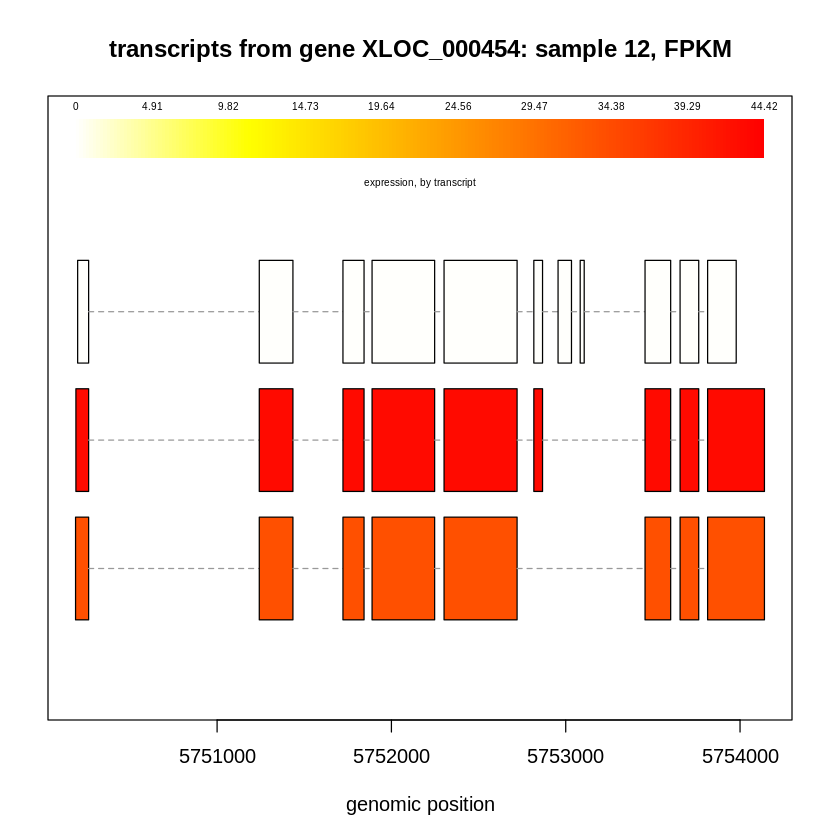

In [ ]:
plotTranscripts(gene='WBGene00002054', gown=bg, samples='N2_day1_rep1',
    meas='FPKM', colorby='transcript',
    main='transcripts from gene XLOC_000454: sample 12, FPKM')

It is also possible to plot several samples at once:



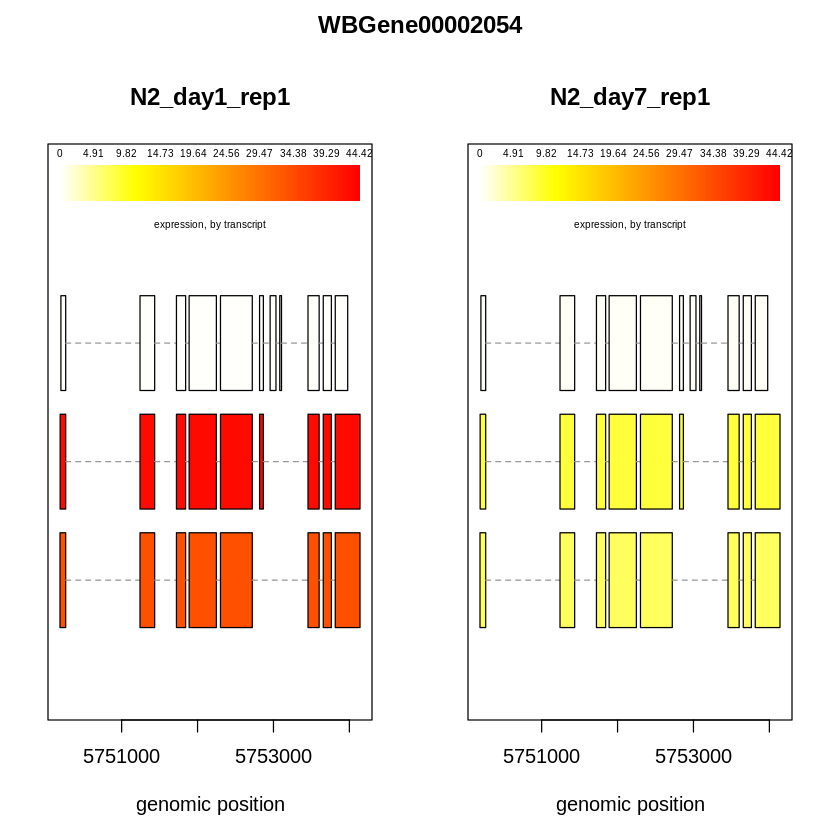

In [ ]:
plotTranscripts('WBGene00002054', bg,
    samples=c('N2_day1_rep1', 'N2_day7_rep1'),
    meas='FPKM', colorby='transcript')

You can also make side-by-side plots comparing mean abundances between groups (here, 0 and 1):



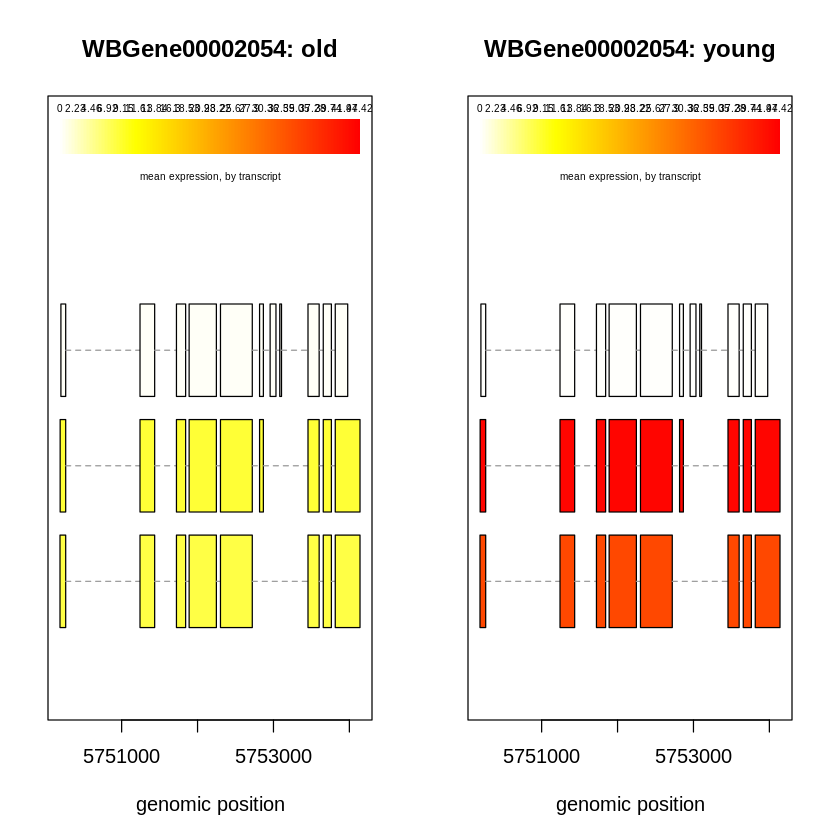

In [ ]:
plotMeans('WBGene00002054', bg, groupvar='group', meas='FPKM', colorby='transcript')

## Differential expression analysis

Ballgown provides a wide selection of simple, fast statistical methods for testing whether transcripts are differentially expressed between experimental conditions or across a continuous covariate (such as time).



In [ ]:
stat_results = stattest(bg, feature='transcript',
                   meas='FPKM', covariate='group',
                   getFC=TRUE)


In [ ]:
results_transcripts <- data.frame(geneNames = geneNames(bg),
                                  geneIDs = geneIDs(bg),
                                  transcriptNames = transcriptNames(bg),
                                  stat_results)

In [ ]:
head(results_transcripts)

,geneNames,geneIDs,transcriptNames,feature,id,fc,pval,qval
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Y74C9A.6,WBGene00023193,Y74C9A.6,transcript,1,0.3087935,0.313759448,0.52196762
2,homt-1,WBGene00022277,Y74C9A.3.1,transcript,2,0.6960674,0.006886113,0.08724496
3,nlp-40,WBGene00022276,Y74C9A.2a.3,transcript,3,0.9999961,0.948535319,0.96924051
4,nlp-40,WBGene00022276,Y74C9A.2a.1,transcript,4,0.4248382,0.040862773,0.16836530
5,nlp-40,WBGene00022276,Y74C9A.2a.2,transcript,5,4.8007011,0.050336942,0.18664213
6,nlp-40,WBGene00022276,Y74C9A.2b.1,transcript,6,0.6299300,0.112477785,0.29368625


In [ ]:
results_transcripts <- results_transcripts[order(results_transcripts$qval), ]

In [ ]:
head(results_transcripts, 10)

,geneNames,geneIDs,transcriptNames,feature,id,fc,pval,qval
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1940,F48C1.8,WBGene00018600,F48C1.8.1,transcript,1940,2.1012606,5.213184e-06,0.01647351
3643,F32H2.15,WBGene00284858,F32H2.15,transcript,3643,0.1912040,1.087705e-06,0.01647351
3811,lin-41,WBGene00003026,C12C8.3a.1,transcript,3811,12.1472453,2.940965e-06,0.01647351
6887,,WBGene00044425,F54D12.11,transcript,6887,0.8775027,7.411872e-06,0.01647351
8957,ifb-2,WBGene00002054,F10C1.7a.1,transcript,8957,4.5625027,1.180041e-06,0.01647351
20015,Y69A2AR.28,WBGene00022099,Y69A2AR.28.1,transcript,20015,0.6076403,7.905547e-06,0.01647351
20798,str-185,WBGene00006228,R08C7.7.1,transcript,20798,0.9668631,8.516315e-06,0.01647351
23441,unc-44,WBGene00006780,B0350.2a.1,transcript,23441,3.3319026,5.919439e-06,0.01647351
25280,plp-1,WBGene00004046,F45E4.2.1,transcript,25280,0.7053267,7.087841e-06,0.01647351


In [ ]:
results_transcripts[results_transcripts$geneIDs == "WBGene00002054", ]

,geneNames,geneIDs,transcriptNames,feature,id,fc,pval,qval
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
8957,ifb-2,WBGene00002054,F10C1.7a.1,transcript,8957,4.562503,1.180041e-06,0.01647351
8956,ifb-2,WBGene00002054,F10C1.7c.1,transcript,8956,3.554543,3.838807e-04,0.04612121
8958,ifb-2,WBGene00002054,F10C1.7e.1,transcript,8958,1.009672,8.838138e-01,0.93058010


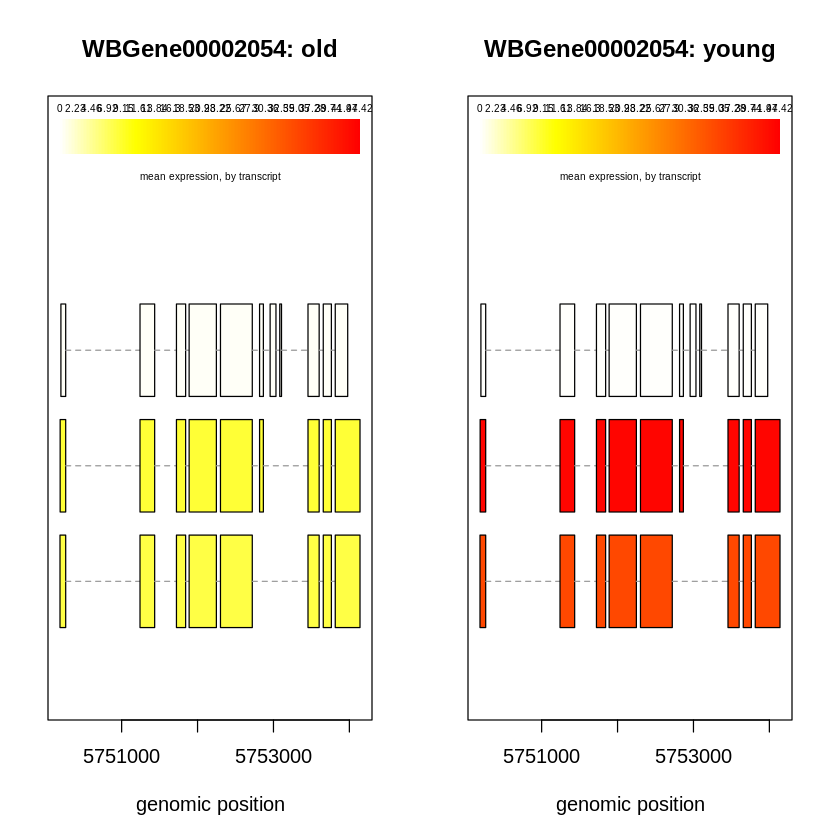

In [ ]:
plotMeans('WBGene00002054', bg, groupvar='group', meas='FPKM', colorby='transcript')

In [32]:
write.csv(results_transcripts,
   file = "BIOI611_bulkRNA_SE_ballgown.csv",
   row.names = FALSE)

In [ ]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ballgown_2.36.0

loaded via a namespace (and not attached):
 [1] IRdisplay_1.1               blob_1.2.4                 
 [3] Biostrings_2.72.1           bitops_1.0-9         

## Reference

https://www.bioconductor.org/packages/release/bioc/vignettes/ballgown/inst/doc/ballgown.html